In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install indic-nlp-library

In [ ]:
import pandas as pd
import re
import random
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Bengali/Bengali.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

Post  Labels Set Category  \
0                     ‡¶Ø‡¶§‡ßç‡¶§‡¶∏‡¶¨ ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶´‡¶æ‡¶ú‡¶≤‡¶æ‡¶Æ‡ßÄ!!!!!           1   sports   
1                  ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶∞‡ßá ‡¶∞‡¶ø‡¶Æ‡¶æ‡¶®‡ßç‡¶°‡ßá ‡¶®‡ßá‡¶ì‡ßü‡¶æ ‡¶¶‡¶∞‡¶ï‡¶æ‡¶∞           1   sports   
2  ‡¶ú‡¶ø‡¶≤‡ßç‡¶≤‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßç‡¶Ø‡¶æ‡¶∞‡ßá‡¶∞ ‡¶õ‡ßá‡¶≤‡ßá ‡¶è‡¶§‡ßã ‡¶¨‡ßú ‡¶ú‡¶æ‡¶∞‡¶ú ‡¶π‡¶¨‡ßá ‡¶è‡¶ü‡¶æ...           1   sports   
3                ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶≤‡ßÅ‡¶ö‡ßç‡¶ö‡¶æ ‡¶¶‡ßá‡¶ñ‡¶§‡ßá ‡¶™‡¶æ‡¶†‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶Ø‡¶æ‡ßü           1   sports   
4   ‡¶§‡ßÅ‡¶á ‡¶§‡ßã ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶ó‡¶æ‡¶ú‡¶æ ‡¶ñ‡¶æ‡¶á‡¶õ‡¶ö‡•§‡¶§‡ßÅ‡¶∞ ‡¶Æ‡¶æ‡¶∞ ‡¶π‡ßá‡¶°‡¶æ‡ßü ‡¶ñ‡ßá‡¶≤‡¶¨‡ßá ‡¶∏‡¶æ‡¶ï‡¶ø‡¶¨           1   sports   

                Dataset  
0  Bengali hate speech   
1  Bengali hate speech   
2  Bengali hate speech   
3  Bengali hate speech   
4  Bengali hate speech

<ipython-input-113-168ab42a48df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Labels Set', y='Category', inner='box', palette='Dark2')


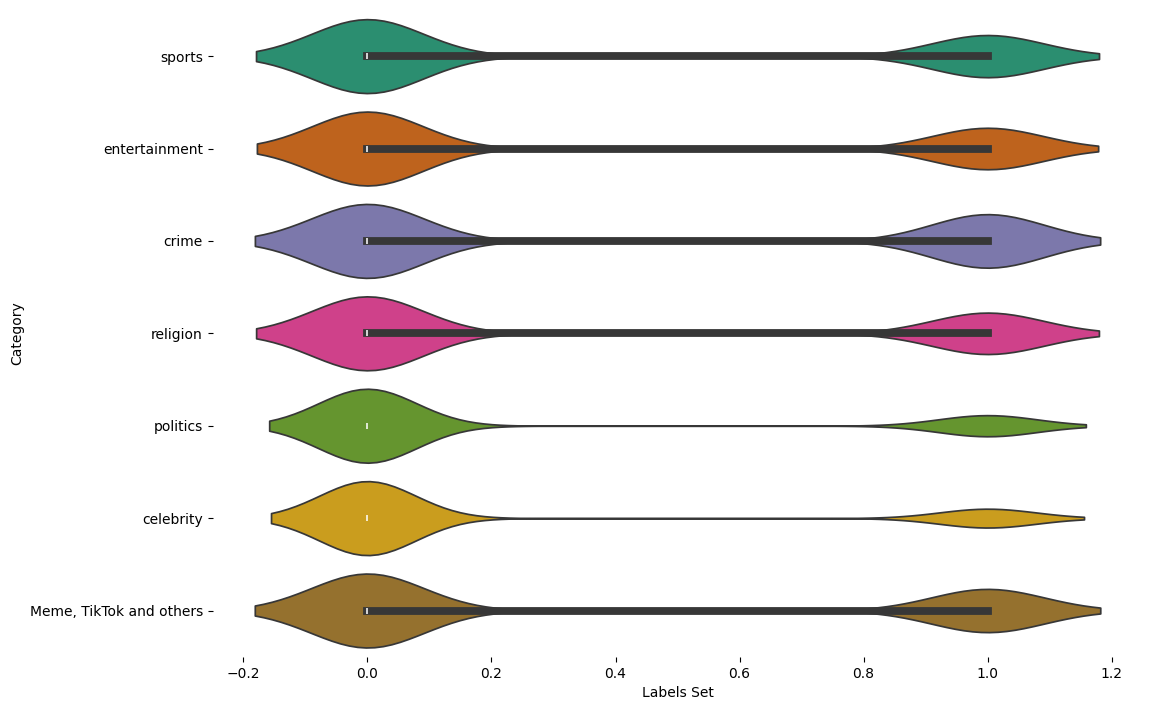

In [ ]:
# @title Category vs Labels Set

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Labels Set', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

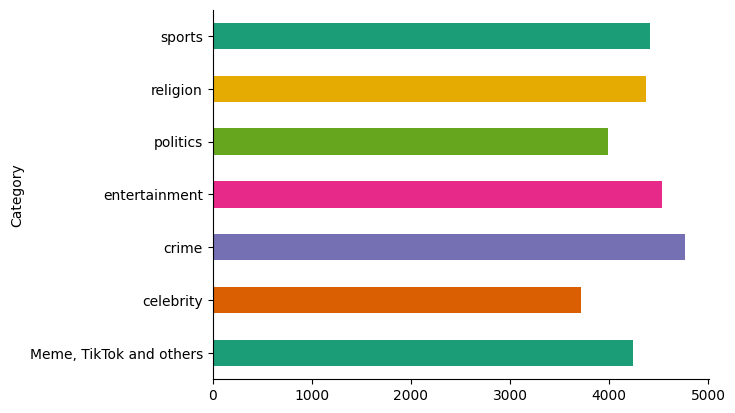

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

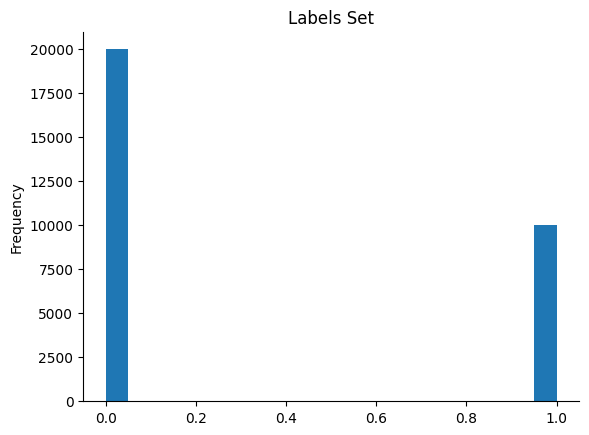

In [ ]:
# @title Labels Set

from matplotlib import pyplot as plt
df['Labels Set'].plot(kind='hist', bins=20, title='Labels Set')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# # Remove rows with 'FAKE' label
# df = df[df['Labels Set'] != 'fake']

# #Print length of the dataset
# print("Length of the dataset: ", len(df))

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Duplicate rows found. Removing duplicates...
Length of the dataset after cleaning:  29946


In [ ]:
df.head()

Post  Labels Set Category  \
0                     ‡¶Ø‡¶§‡ßç‡¶§‡¶∏‡¶¨ ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶´‡¶æ‡¶ú‡¶≤‡¶æ‡¶Æ‡ßÄ!!!!!           1   sports   
1                  ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶∞‡ßá ‡¶∞‡¶ø‡¶Æ‡¶æ‡¶®‡ßç‡¶°‡ßá ‡¶®‡ßá‡¶ì‡ßü‡¶æ ‡¶¶‡¶∞‡¶ï‡¶æ‡¶∞           1   sports   
2  ‡¶ú‡¶ø‡¶≤‡ßç‡¶≤‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßç‡¶Ø‡¶æ‡¶∞‡ßá‡¶∞ ‡¶õ‡ßá‡¶≤‡ßá ‡¶è‡¶§‡ßã ‡¶¨‡ßú ‡¶ú‡¶æ‡¶∞‡¶ú ‡¶π‡¶¨‡ßá ‡¶è‡¶ü‡¶æ...           1   sports   
3                ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶≤‡ßÅ‡¶ö‡ßç‡¶ö‡¶æ ‡¶¶‡ßá‡¶ñ‡¶§‡ßá ‡¶™‡¶æ‡¶†‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶Ø‡¶æ‡ßü           1   sports   
4   ‡¶§‡ßÅ‡¶á ‡¶§‡ßã ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶ó‡¶æ‡¶ú‡¶æ ‡¶ñ‡¶æ‡¶á‡¶õ‡¶ö‡•§‡¶§‡ßÅ‡¶∞ ‡¶Æ‡¶æ‡¶∞ ‡¶π‡ßá‡¶°‡¶æ‡ßü ‡¶ñ‡ßá‡¶≤‡¶¨‡ßá ‡¶∏‡¶æ‡¶ï‡¶ø‡¶¨           1   sports   

                Dataset  
0  Bengali hate speech   
1  Bengali hate speech   
2  Bengali hate speech   
3  Bengali hate speech   
4  Bengali hate speech

In [ ]:
import re

def remove_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    # Remove emojis from the text using the pattern
    return emoji_pattern.sub(r'', text)

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove mentions, email addresses, URLs, RT (retweet)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s*@\S+', '', text)  # Remove retweets
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation marks (comma and purnviram)
    text = re.sub(r'[\u002C\u0964]', '', text)
    # Remove special characters and accented characters
    #text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

In [ ]:
preprocess_text("‡¶Ø‡¶§‡ßç‡¶§‡¶∏‡¶¨ ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶´‡¶æ‡¶ú‡¶≤‡¶æ‡¶Æ‡ßÄ!!!!!")

'‡¶Ø‡¶§‡ßç‡¶§‡¶∏‡¶¨ ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶´‡¶æ‡¶ú‡¶≤‡¶æ‡¶Æ‡ßÄ!!!!!'

In [ ]:
# Preprocess the 'Post' column
df['Processed_Post'] = df['Post'].apply(preprocess_text)
df['Processed_Post'] = df['Processed_Post'].apply(remove_emojis)

df.head(10)

Post  Labels Set Category  \
0                     ‡¶Ø‡¶§‡ßç‡¶§‡¶∏‡¶¨ ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶´‡¶æ‡¶ú‡¶≤‡¶æ‡¶Æ‡ßÄ!!!!!           1   sports   
1                  ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶∞‡ßá ‡¶∞‡¶ø‡¶Æ‡¶æ‡¶®‡ßç‡¶°‡ßá ‡¶®‡ßá‡¶ì‡ßü‡¶æ ‡¶¶‡¶∞‡¶ï‡¶æ‡¶∞           1   sports   
2  ‡¶ú‡¶ø‡¶≤‡ßç‡¶≤‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßç‡¶Ø‡¶æ‡¶∞‡ßá‡¶∞ ‡¶õ‡ßá‡¶≤‡ßá ‡¶è‡¶§‡ßã ‡¶¨‡ßú ‡¶ú‡¶æ‡¶∞‡¶ú ‡¶π‡¶¨‡ßá ‡¶è‡¶ü‡¶æ...           1   sports   
3                ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶≤‡ßÅ‡¶ö‡ßç‡¶ö‡¶æ ‡¶¶‡ßá‡¶ñ‡¶§‡ßá ‡¶™‡¶æ‡¶†‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶Ø‡¶æ‡ßü           1   sports   
4   ‡¶§‡ßÅ‡¶á ‡¶§‡ßã ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶ó‡¶æ‡¶ú‡¶æ ‡¶ñ‡¶æ‡¶á‡¶õ‡¶ö‡•§‡¶§‡ßÅ‡¶∞ ‡¶Æ‡¶æ‡¶∞ ‡¶π‡ßá‡¶°‡¶æ‡ßü ‡¶ñ‡ßá‡¶≤‡¶¨‡ßá ‡¶∏‡¶æ‡¶ï‡¶ø‡¶¨           1   sports   
5  ‡¶è‡¶ü‡¶æ ‡¶ï‡ßÅ‡¶® ‡¶¶‡¶∞‡¶®‡ßá‡¶∞ ‡¶ï‡ßá‡¶≤‡¶æ ‡¶´‡¶æ‡¶á‡¶ú‡¶≤‡¶æ‡¶Æ‡¶ø ‡¶§‡¶æ‡¶∏‡ßç‡¶ï‡¶ø‡¶® ‡¶∞‡ßá ‡¶ö‡¶∞ ‡¶Æ‡¶æ‡¶∞‡¶æ...           1   sports   
6                   ‡¶™‡¶æ‡¶™‡¶® ‡¶≠‡¶∞ ‡¶Æ‡¶æ‡¶¶‡¶æ ‡¶ö‡ßã‡¶¶ ‡¶™‡¶æ‡¶™‡¶®‡ßá ‡¶™‡¶¶‡¶§‡ßá‡¶ï ‡¶ö‡¶æ‡¶á           1   sports   
7                              ‡¶¶‡ßÅ‡¶∞‡ßã ‡¶∏‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶™‡ßÅ‡¶¶ ‡¶ö‡ßÅ‡¶™‡¶•‡¶æ‡¶ï           1   sports   
8                                 ‡¶ï‡ßÅ‡¶§‡ßç‡¶§‡¶æ‡¶∞ ‡¶¨‡¶æ‡¶õ‡¶ö‡¶æ ‡¶™‡¶æ‡¶™‡¶®           1   sports   
9                                  ‡¶¨‡¶æ‡¶≤ ‡¶õ‡¶æ‡¶≤ ‡¶§‡¶∞ ‡¶∏‡¶æ‡¶â‡ßü‡¶æüò°           1   sports   

                Dataset                                     Processed_Post  
0  Bengali hate speech                      ‡¶Ø‡¶§‡ßç‡¶§‡¶∏‡¶¨ ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶´‡¶æ‡¶ú‡¶≤‡¶æ‡¶Æ‡ßÄ!!!!!  
1  Bengali hate speech                   ‡¶™‡¶æ‡¶™‡¶® ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶∞‡ßá ‡¶∞‡¶ø‡¶Æ‡¶æ‡¶®‡ßç‡¶°‡ßá ‡¶®‡ßá‡¶ì‡ßü‡¶æ ‡¶¶‡¶∞‡¶ï‡¶æ‡¶∞  
2  Bengali hate speech   ‡¶ú‡¶ø‡¶≤‡ßç‡¶≤‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßç‡¶Ø‡¶æ‡¶∞‡ßá‡¶∞ ‡¶õ‡ßá‡¶≤‡ßá ‡¶è‡¶§‡ßã ‡¶¨‡ßú ‡¶ú‡¶æ‡¶∞‡¶ú ‡¶π‡¶¨‡ßá ‡¶è‡¶ü‡¶æ...  
3  Bengali hate speech                 ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶≤‡ßÅ‡¶ö‡ßç‡¶ö‡¶æ ‡¶¶‡ßá‡¶ñ‡¶§‡ßá ‡¶™‡¶æ‡¶†‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶Ø‡¶æ‡ßü  
4  Bengali hate speech    ‡¶§‡ßÅ‡¶á ‡¶§‡ßã ‡¶∂‡¶æ‡¶≤‡¶æ ‡¶ó‡¶æ‡¶ú‡¶æ ‡¶ñ‡¶æ‡¶á‡¶õ‡¶ö‡•§‡¶§‡ßÅ‡¶∞ ‡¶Æ‡¶æ‡¶∞ ‡¶π‡ßá‡¶°‡¶æ‡ßü ‡¶ñ‡ßá‡¶≤‡¶¨‡ßá ‡¶∏‡¶æ‡¶ï‡¶ø‡¶¨  
5  Bengali hate speech   ‡¶è‡¶ü‡¶æ ‡¶ï‡ßÅ‡¶® ‡¶¶‡¶∞‡¶®‡ßá‡¶∞ ‡¶ï‡ßá‡¶≤‡¶æ ‡¶´‡¶æ‡¶á‡¶ú‡¶≤‡¶æ‡¶Æ‡¶ø ‡¶§‡¶æ‡¶∏‡ßç‡¶ï‡¶ø‡¶® ‡¶∞‡ßá ‡¶ö‡¶∞ ‡¶Æ‡¶æ‡¶∞‡¶æ...  
6  Bengali hate speech                    ‡¶™‡¶æ‡¶™‡¶® ‡¶≠‡¶∞ ‡¶Æ‡¶æ‡¶¶‡¶æ ‡¶ö‡ßã‡¶¶ ‡¶™‡¶æ‡¶™‡¶®‡ßá ‡¶™‡¶¶‡¶§‡ßá‡¶ï ‡¶ö‡¶æ‡¶á  
7  Bengali hate speech                               ‡¶¶‡ßÅ‡¶∞‡ßã ‡¶∏‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶™‡ßÅ‡¶¶ ‡¶ö‡ßÅ‡¶™‡¶•‡¶æ‡¶ï  
8  Bengali hate speech                                  ‡¶ï‡ßÅ‡¶§‡ßç‡¶§‡¶æ‡¶∞ ‡¶¨‡¶æ‡¶õ‡¶ö‡¶æ ‡¶™‡¶æ‡¶™‡¶®  
9  Bengali hate speech                                    ‡¶¨‡¶æ‡¶≤ ‡¶õ‡¶æ‡¶≤ ‡¶§‡¶∞ ‡¶∏‡¶æ‡¶â‡ßü‡¶æ

## Code to save the files

In [ ]:
train_hate_df = df[df["Labels Set"] == 1].copy()
train_non_hate_df = df[df["Labels Set"] == 0].copy()

sampled_hate_df = train_hate_df.sample(n=2500, random_state=42)
sampled_non_hate_df = train_non_hate_df.sample(n=2500, random_state=42)

train_sampled_hate_df = sampled_hate_df.iloc[:2000]
train_sampled_non_hate_df = sampled_non_hate_df.iloc[:2000]

train_concatenated_df = pd.concat([train_sampled_hate_df, train_sampled_non_hate_df], axis=0)
train_df = train_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_sampled_hate_df = sampled_hate_df.iloc[-500:]
test_sampled_non_hate_df = sampled_non_hate_df.iloc[-500:]

test_concatenated_df = pd.concat([test_sampled_hate_df, test_sampled_non_hate_df], axis=0)
test_df = test_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [ ]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')